**Self-Organizing Map (SOM)**

Von Teuvo Kohonen stammt die Self-Organizing Map (SOM), eine spezielle Form eines künstlichen neuronalen Netzes. Eine SOM eignet sich fürs Clustering. Mit *Clustering* wird im Machine Learning eine Problemklasse des unüberwachten Lernens (unsupervised learning) bezeichnet, bei der es um die Identifikation von Cluster (Klassen, Gruppen), die sich durch eine Reihe von Merkmalen bzw. Merkmalswerten auszeichnen, geht. Im Gegensatz zum überwachten Lernen (supervised learning) existieren beim unüberwachten Lernen keine bekannten Zielwerte.

Der grundlegende Aufbau einer SOM ist der nachfolgenden Abbildung zu entnehmen.

[Image]

Die Anpassung der Gewichte, die während der Trainingsphase einer SOM gelernt werden, erfolgt allgemein gemäß der Vorschrift

$w_{ij}(t+1) = w_{ij}(t) + \alpha(t) \cdot h_{cj}(t) \cdot [x_i(t) - w_{ij}(t)], \forall j=1..m, i=1..n$

mit\
$w_{ij}(t)$ = Gewicht der Grid-Unit $j$ zur Input-Unit $i$ zum Zeitpunkt $t$\
$\alpha(t)$ = Lernrate zum Zeitpunkt $t$\
$h_{cj}(t)$ = Nachbarschaftsfunktion zum Zeitpunkt $t$\
$x_i(t)$ = Merkmalswert der Input-Unit $i$ zum Zeitpunkt $t$

Eine SOM bemisst zum Eingabevektor $\mathbf{x}=(x_{1},\ldots, x_{i}, \ldots , x_{n})$ die Ähnlichkeit zum Gewichtsvektor $\mathbf{w_j}=(w_{1j},\ldots, w_{ij}, \ldots , w_{nj})$ einer jeden Grid-Unit $j$ nach der minimalen euklidischen Distanz und bestimmt dabei die Sieger-Unit, auch als Best-Matching Unit (BMU) bezeichnet, gemäß:

$c = \underset{j}{\operatorname{argmin}} \left\|\mathbf{x} - \mathbf{w}\right\|_2 = \underset{j}{\operatorname{argmin}} \sqrt{\sum\limits_{i=1}^{n} (x_{i}-w_{ij})^2}$, $\; j \in L$

wobei $L$ das Gitter der Units benennt.

<u>References:</u>
- Kohonen, T. (1972): Correlation Matrix Memories. In: IEEE Transactions on Computers, C–21 (1972) 4, S. 353-359.
- Kohonen, Teuvo (1982): Self-organized formation of topologically correct feature maps. In: Biological Cybernetics, 43 (1982) 1, S. 59-69.
- Kohonen, Teuvo (1989): Self-Organization and Associative Memory. 3. Aufl., 1989. Berlin: Springer.
- Kohonen, Teuvo (2001): Self-Organizing Maps. 3. Aufl., 2001. Berlin, New York: Springer.

In [27]:
# Data Science
import numpy as np
import pandas as pd
# Machine Learning
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [28]:
# Load iris dataset
iris = datasets.load_iris()
# Create dataframe with features and target
rawdata = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])
rawdata = rawdata.astype({'target':'int'}) # 0=setosa, 1=versicolor, 2=virginica
rawdata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
# Drop target column because we want to predict the class
rawdata.drop(['target'], axis=1, inplace=True)
rawdata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
scaleddata = pd.DataFrame(data=scaler.fit_transform(rawdata), columns=iris.feature_names)
scaleddata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


## Train SOM

In [31]:
som_data = scaleddata.to_numpy()
# Initializing and training
som_shape = (3, 3) 
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=som_data.shape[1], sigma=0.5, neighborhood_function='gaussian')
som.train(som_data, num_iteration=30000)

In [32]:
codebook = som.get_weights()
codebook #vorher war da noch codebook.shape

array([[[0.90265078, 0.46562062, 0.89102726, 0.79551619],
        [0.64690177, 0.50450209, 0.76217448, 0.92083854],
        [0.51734705, 0.35692159, 0.7028764 , 0.75193642]],

       [[0.61191297, 0.42542817, 0.63048994, 0.58074424],
        [0.51248801, 0.1504897 , 0.65600654, 0.5374246 ],
        [0.41980475, 0.36595738, 0.54978019, 0.50286818]],

       [[0.2715748 , 0.19669159, 0.4750483 , 0.46881078],
        [0.14701071, 0.50361189, 0.06889516, 0.06859489],
        [0.27293531, 0.77910524, 0.09325066, 0.0672618 ]]])

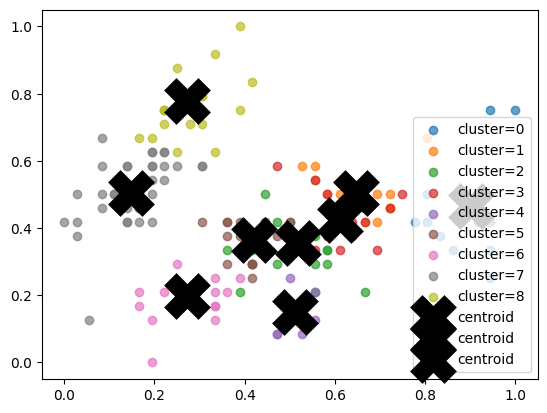

In [33]:
# each unit represents a cluster or is part of a cluster consisting of multiple units
winner_coordinates = np.array([som.winner(x) for x in som_data]).T
# with np.ravel_multi_index we convert the bidimensional coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(som_data[cluster_index == c, 0],
som_data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
s=80, linewidths=35, color='k', label='centroid')
plt.legend()
plt.show()

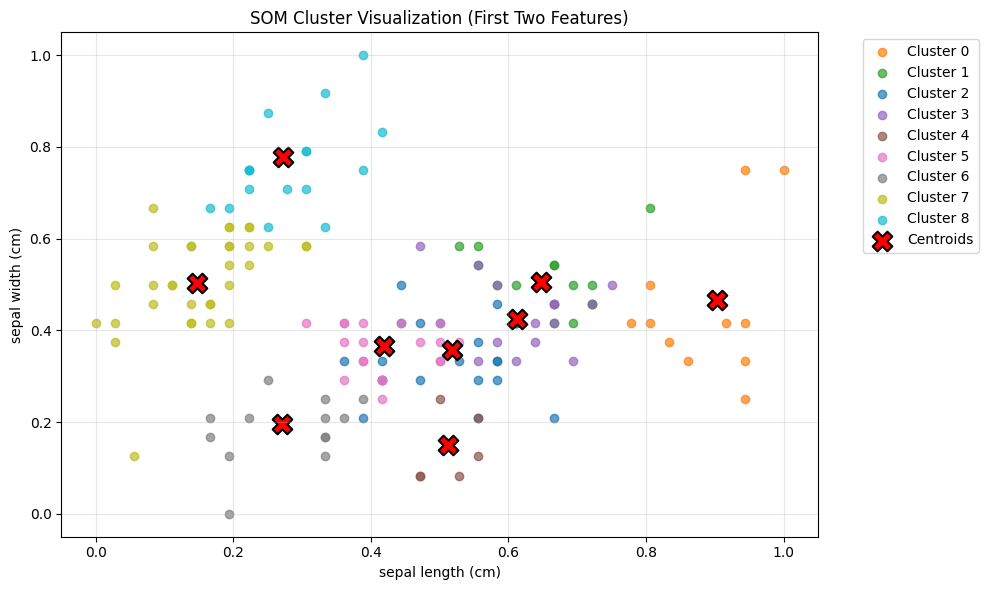


Anzahl Datenpunkte pro Cluster:
0    11
1    16
2    21
3    14
4     6
5    19
6    13
7    33
8    17
Name: count, dtype: int64


In [34]:
# Cluster-Zuordnungen berechnen
winner_coordinates = np.array([som.winner(x) for x in som_data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Erstelle den Plot
plt.figure(figsize=(10, 6))

# Plotte die Datenpunkte für jeden Cluster
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd', '#8c564b', 
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']  # 9 Farben für 9 Cluster
for c in np.unique(cluster_index):
    mask = cluster_index == c
    plt.scatter(som_data[mask, 0],
               som_data[mask, 1],
               label=f'Cluster {c}',
               color=colors[c],
               alpha=0.7)

# Plotte die Centroids - korrekte Reshape-Operation
centroids = som.get_weights().reshape(-1, som_data.shape[1])  # reshape zu (9, 4)
plt.scatter(centroids[:, 0],
           centroids[:, 1],
           marker='X',
           s=200,
           color='red',
           label='Centroids',
           edgecolor='black',
           linewidth=1.5)

# Beschriftungen und Layout
plt.xlabel(scaleddata.columns[0])
plt.ylabel(scaleddata.columns[1])
plt.title('SOM Cluster Visualization (First Two Features)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Zeige die Clustergrössen
print("\nAnzahl Datenpunkte pro Cluster:")
print(pd.Series(cluster_index).value_counts().sort_index())

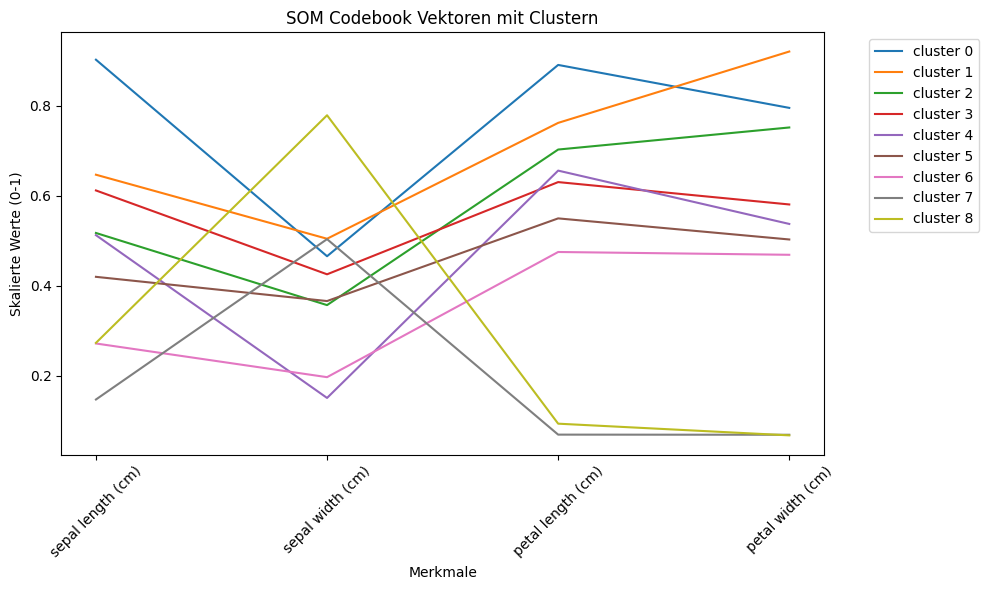

In [35]:
# Plotting the Codebook Vectors
plt.figure(figsize=(10, 6))
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        plt.plot(range(scaleddata.shape[1]), codebook[i, j], label=f'cluster {i * som_shape[1] + j}') 

# Achsenbeschriftungen und Titel
plt.xticks(range(len(scaleddata.columns)), scaleddata.columns, rotation=45)
plt.xlabel("Merkmale")
plt.ylabel("Skalierte Werte (0-1)")
plt.title("SOM Codebook Vektoren mit Clustern")

# Legende und Layout
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

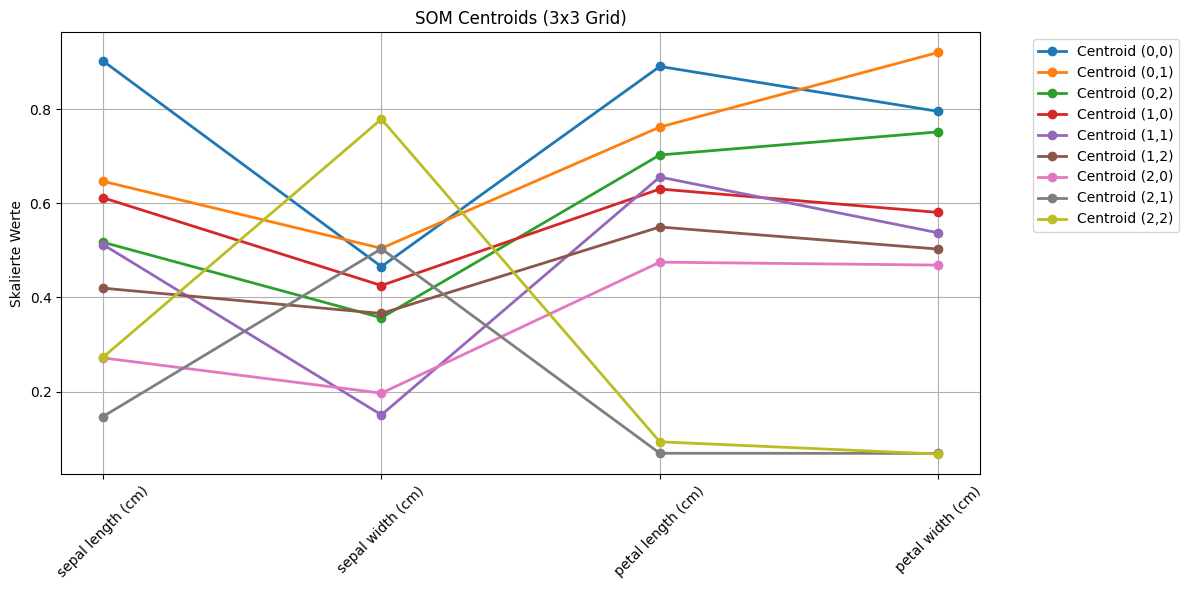


Anzahl Datenpunkte pro Cluster:
0    11
1    16
2    21
3    14
4     6
5    19
6    13
7    33
8    17
Name: count, dtype: int64


In [36]:
# Extrahiere die bereits existierenden Centroids aus der trainierten SOM
existing_centroids = som.get_weights()

# Erstelle DataFrame für bessere Übersicht
# Reshape von (3, 3, 4) zu (9, 4)
centroids_reshaped = existing_centroids.reshape(-1, som_data.shape[1])
centroid_df = pd.DataFrame(
    centroids_reshaped,
    columns=scaleddata.columns,
    index=[f'Centroid ({i},{j})' for i in range(som_shape[0]) for j in range(som_shape[1])]
)

# Visualisierung der Centroids
plt.figure(figsize=(12, 6))

# Plotte jeden Centroid
for idx in centroid_df.index:
    plt.plot(range(len(centroid_df.columns)), 
            centroid_df.loc[idx], 
            'o-', 
            linewidth=2, 
            label=idx)

# Beschriftungen
plt.xticks(range(len(centroid_df.columns)), 
          centroid_df.columns, 
          rotation=45)
plt.ylabel('Skalierte Werte')
plt.title('SOM Centroids (3x3 Grid)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Zeige die Clusterzuordnungen
winner_coordinates = np.array([som.winner(x) for x in som_data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

print("\nAnzahl Datenpunkte pro Cluster:")
cluster_counts = pd.Series(cluster_index).value_counts().sort_index()
print(cluster_counts)

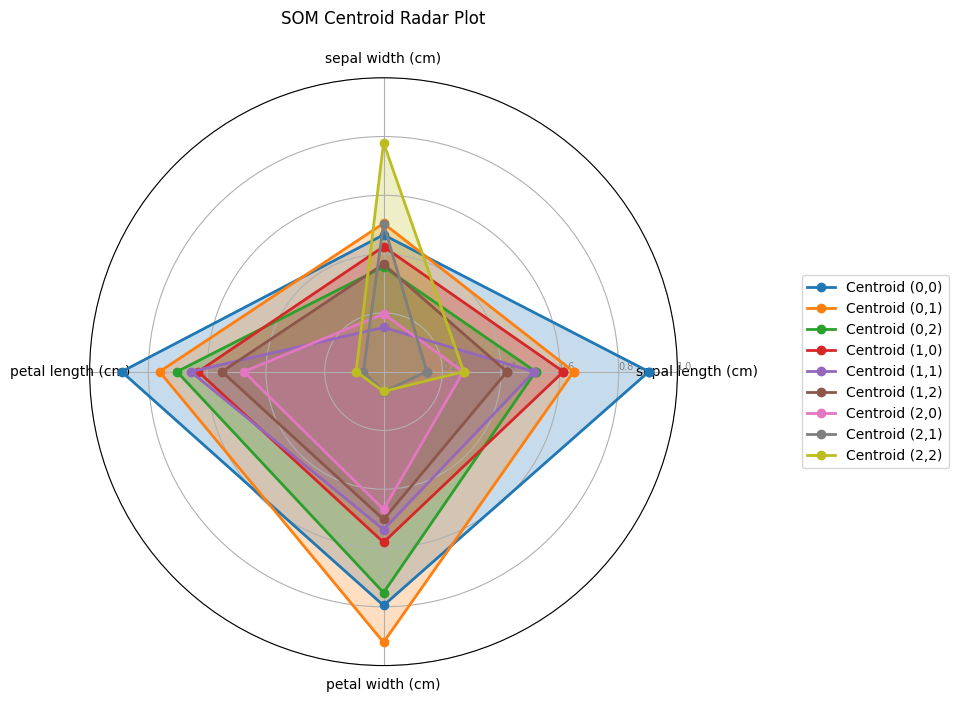

In [37]:
def plot_radar_centroids(codebook, feature_names, som_shape):
    # Anzahl der Features/Dimensionen
    num_features = len(feature_names)
    
    # Winkel für den Plot berechnen
    angles = [n / float(num_features) * 2 * np.pi for n in range(num_features)]
    angles += angles[:1]  # Kreis schließen
    
    # Subplot mit polaren Koordinaten erstellen
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Für jedes Centroid einen Plot erstellen
    for i in range(som_shape[0]):
        for j in range(som_shape[1]):
            values = codebook[i, j].tolist()
            values += values[:1]  # Kreis schließen
            
            # Plot für aktuelles Centroid
            ax.plot(angles, values, 'o-', linewidth=2, label=f'Centroid ({i},{j})')
            ax.fill(angles, values, alpha=0.25)
    
    # Features als Labels setzen
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_names)
    
    # Grid anpassen
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color="grey", size=7)
    plt.ylim(0, 1)
    
    # Titel und Legende
    plt.title("SOM Centroid Radar Plot", pad=20)
    plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
    
    plt.tight_layout()
    plt.show()

# Funktion mit deinen Daten aufrufen
plot_radar_centroids(codebook, iris.feature_names, som_shape)

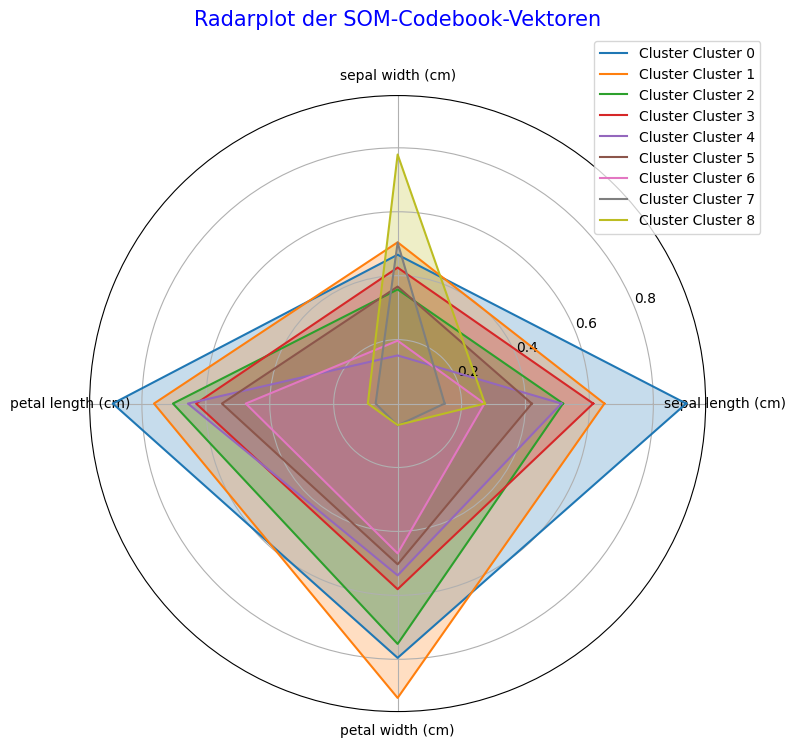

In [38]:
# Radarplot zur Darstellung der Codebook-Vektoren
def radar_plot(data, cluster_names, feature_names, title="Radarplot der SOM-Codebook-Vektoren"):
    """
    Erstellt einen Radarplot für SOM-Codebook-Vektoren.
    
    Args:
    - data: 2D-Array mit den Codebook-Vektoren (Clusters x Features)
    - cluster_names: Liste der Clusternamen
    - feature_names: Liste der Merkmalnamen
    - title: Titel des Plots
    """
    num_vars = len(feature_names)

    # Winkel für jedes Merkmal berechnen
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Schließt den Kreis

    # Plot erstellen
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, cluster in enumerate(data):
        values = cluster.tolist()
        values += values[:1]  # Schließt den Kreis
        ax.plot(angles, values, label=f'Cluster {cluster_names[i]}')
        ax.fill(angles, values, alpha=0.25)

    # Achsenbeschriftungen
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_names)

    # Titel und Legende
    plt.title(title, size=15, color="blue", y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Daten vorbereiten
codebook_vectors = codebook.reshape(-1, codebook.shape[-1])  # Flache Codebook-Matrix (9 Cluster x 4 Features)
cluster_names = [f"Cluster {i}" for i in range(codebook_vectors.shape[0])]
feature_names = scaleddata.columns.tolist()

# Radarplot zeichnen
radar_plot(data=codebook_vectors, cluster_names=cluster_names, feature_names=feature_names)
